Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

Importing the Data files

In [ ]:
data_train = pd.read_csv("Train_data.csv")

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
columns=['duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [ ]:
## Loading the Test Dataset

data_test = pd.read_csv("Test_data.csv")

In [ ]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


Finding the distinct values 

In [ ]:
data_train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
standardized_train_data = scaler.fit_transform(data_train.select_dtypes(include=['float64','int64']))
standardized_test_data = scaler.fit_transform(data_test.select_dtypes(include=['float64','int64']))

In [ ]:
standardized_train_data

array([[-0.11355066, -0.00988885, -0.03930979, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066, -0.01003196, -0.03930979, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.01009252, -0.03930979, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [ ]:
standardized_test_data

array([[-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15411277,  0.0054731 , -0.09689597, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       ...,
       [-0.15553409,  0.09337309,  0.29492588, ..., -0.3527496 ,
        -0.4219432 , -0.39086113],
       [-0.15553409, -0.02189927, -0.0949166 , ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         0.53358543,  1.9291162 ]])

In [ ]:
standardized_traindf = pd.DataFrame(standardized_train_data, columns=columns)
standardized_testdf = pd.DataFrame(standardized_test_data, columns=columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# extracting object type columns from both sets 
data1_train = data_train.select_dtypes(include=['object']).copy()
data1_test = data_test.select_dtypes(include=['object']).copy()

In [ ]:
# encoding categorical attributes
encoding_train = data1_train.apply(encoder.fit_transform)
encoding_test = data1_test.apply(encoder.fit_transform)

In [ ]:
encoding_train.head()

,protocol_type,service,flag,class
0,1,19,9,1
1,2,41,9,1
2,1,46,5,0
3,1,22,9,1
4,1,22,9,1


In [ ]:
encoding_test.head()

,protocol_type,service,flag
0,1,45,1
1,1,45,1
2,1,19,9
3,0,13,9
4,1,55,2


In [ ]:
# separate target column from encoded data 
encoded_train = encoding_train.drop(['class'], axis=1)
encoded_target= encoding_train[['class']].copy()

In [ ]:
x_train= pd.concat([standardized_traindf,encoding_train],axis=1)
y_train = data1_train['class']
x_train.shape

(25192, 42)

In [ ]:
x_test= pd.concat([standardized_testdf,encoding_test],axis=1)
x_test.shape

(22544, 41)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

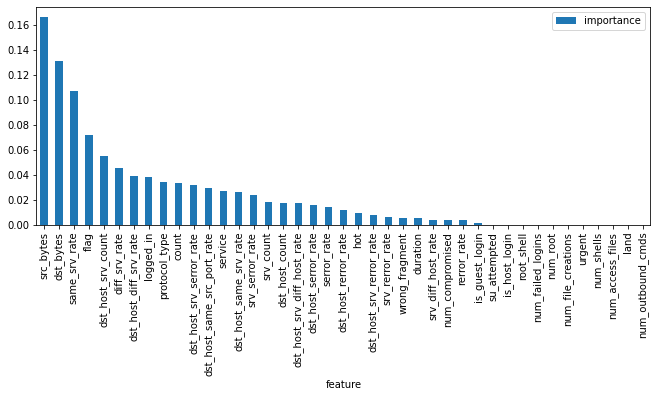

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fitting random forest classifier on the training set
rfc.fit(train_x, train_y);
# extracting  essential features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plotting importance
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,train_size=0.70, random_state=2)

KNN Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Train KNeighborsClassifier Model
model_1 = KNeighborsClassifier(n_jobs=-1)
model_1.fit(X_train, Y_train); 

In [ ]:
predictions=model_1.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test,predictions)

In [ ]:
print ("Model Accuracy:" "\n", accuracy)

Model Accuracy:
 0.9916644614977508


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test,predictions)
print("Confusion matrix:" "\n", confusion_matrix)

Confusion matrix:
 [[3458   40]
 [  23 4037]]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns


def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(Y_test,predictions )
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("pink")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title('Confusion matrix')
 plt.show()

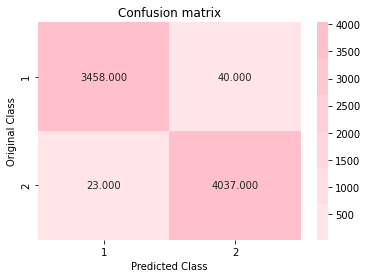

In [ ]:
plot_confusion_matrix(Y_test, predictions)

In [ ]:
classification = metrics.classification_report(Y_train, model_1.predict(X_train))

In [ ]:
print("Classification report:" "\n", classification) 
  

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      8245
      normal       0.99      1.00      0.99      9389

    accuracy                           0.99     17634
   macro avg       0.99      0.99      0.99     17634
weighted avg       0.99      0.99      0.99     17634



logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train LogisticRegression Model
model_2 = LogisticRegression(n_jobs=-1, random_state=0)
model_2.fit(X_train, Y_train);

In [ ]:
predictions_1=LGR_Classifier.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test, predictions_1)
print ("Model Accuracy:" "\n", accuracy)

Model Accuracy:
 0.9546176237099762


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test,predictions_1)
print("Confusion matrix:" "\n", confusion_matrix)

Confusion matrix:
 [[3294  204]
 [ 139 3921]]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns


def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(Y_test,predictions_1 )
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("pink")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title('Confusion matrix')
 plt.show()

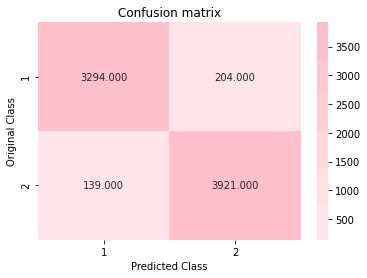

In [ ]:
plot_confusion_matrix( Y_test, predictions_1)

In [ ]:
classification = metrics.classification_report(Y_test,predictions_1)
print("Classification report:" "\n", classification) 

Classification report:
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      3498
      normal       0.95      0.97      0.96      4060

    accuracy                           0.95      7558
   macro avg       0.96      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558



Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB 
# Train Gaussian Naive Baye Model
model_3 = BernoulliNB()
model_3.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
predictions_2=model_3.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test, predictions_2)
print ("Model Accuracy:" "\n", accuracy)

Model Accuracy:
 0.906721354855782


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test,predictions_2)
print("Confusion matrix:" "\n", confusion_matrix)

Confusion matrix:
 [[2981  517]
 [ 188 3872]]


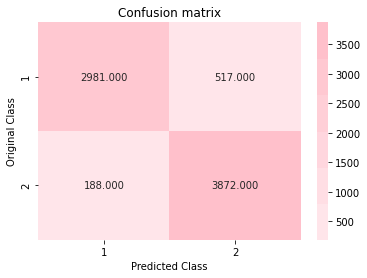

In [ ]:
plot_confusion_matrix( Y_test, predictions_2)

In [ ]:
classification = metrics.classification_report(Y_test,predictions_2)
print("Classification report:" "\n", classification) 

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



In [ ]:
from sklearn import tree

In [ ]:
# Train Decision Tree Model
model_4 = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
model_4.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
predictions_3=model_4.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(Y_test, predictions_3)
print ("Model Accuracy:" "\n", accuracy)

Model Accuracy:
 0.9949722148716592


In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test,predictions_3)
print("Confusion matrix:" "\n", confusion_matrix)

Confusion matrix:
 [[3482   16]
 [  22 4038]]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns


def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(Y_test,predictions_3 )
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("pink")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title('Confusion matrix')
 plt.show()

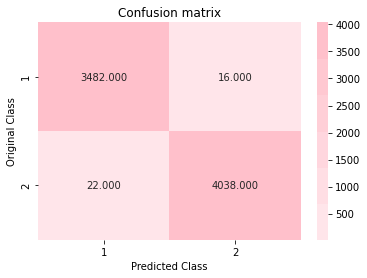

In [ ]:
plot_confusion_matrix( Y_test, predictions_3)

In [ ]:
classification = metrics.classification_report(Y_test,predictions_3)
print("Classification report:" "\n", classification) 

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99      1.00      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In terms of Accuracy, "Decision Tree" has the Highest Accuracy and it is an efficient Model.